# StackOverflow developers survey 2021

Analyzing responses from StackOverflow Annual Developer survey 2021

Here we will follow the following steps:
- Downloading and uploading the data into Jupyter
- Parsing and cleaning the data
- Exploratory data analysis and visualization
- Asking and answering some questions
- Summarizing our observations and conclusions

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="stack-overflow-survey-2021")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

## Downloading and uploading the data

We can download and upload the data either by using the `urllib.request` library, if we have the raw url of the CSV file or by manually downloading the CSV and uploading it vis Jupyter's GUI.

We'll manually upload the files.

In [4]:
# Libraries

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = "#00000000"

In [5]:
os.listdir('.')

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 'README_2021.txt',
 '.ipython',
 'so_survey_2021.pdf',
 'stack-overflow-survey-2021.ipynb',
 '.local',
 'survey_results_schema.csv',
 '.cache',
 '.jovianrc',
 'survey_results_public.csv',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

As we can see we have successfully uploaded the CSV files `survey_results_public.csv`and `survery_results_schema.csv`, and imported the libraries we will be needing.

In [6]:
# schema raw data frame
schema_raw_df = pd.read_csv("survey_results_schema.csv")
schema_raw_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [7]:
# survey raw data frame
survey_raw_df = pd.read_csv("survey_results_public.csv")
survey_raw_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


The dataset contains over 83000 responses to 48 questions, of which some questions were optional. This responses have been anonymized to remove any personally identifiable information, and respondent has been assigned a randomized respondent ID.

In [8]:
# columns of the data frame
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

In [10]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

It appears that shortcodes of questions are used as column names. We can get the full question text from `survey_results_schema` file.

In [11]:
schema_df = schema_raw_df.set_index('qname')['question']
schema_df

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye

In [12]:
schema_df.MainBranch

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>'

We have converted the `schema_raw_df` into a new dataframe with `qname` as index and `question` as the values.

**Note** - We could also have used the `index_col` argument in the `read_csv` function to change the index and value.

In [13]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [14]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [15]:
survey_raw_df.NEWStuck

0        Call a coworker or friend;Visit Stack Overflow...
1                           Visit Stack Overflow;Google it
2        Visit Stack Overflow;Google it;Watch help / tu...
3        Call a coworker or friend;Visit Stack Overflow...
4        Visit Stack Overflow;Go for a walk or other ph...
                               ...                        
83434                  Call a coworker or friend;Google it
83435    Call a coworker or friend;Visit Stack Overflow...
83436    Call a coworker or friend;Visit Stack Overflow...
83437    Call a coworker or friend;Visit Stack Overflow...
83438    Call a coworker or friend;Visit Stack Overflow...
Name: NEWStuck, Length: 83439, dtype: object

In [16]:
schema_df.MetaInfo

'Browser Meta Info'

## Cleaning the data

Before doing any analysis we will first clean the data

The survey responses contains a lot of data, we will here limit ourselves to the following areas:
- Demographic of the survey respondents and the global programming community.
- Distribution of programming, skills, and experience
- Employment related information, preferences and opinions of working professionals

In [17]:
selected_columns = [
    # Demographic
    'Country',
    'Gender',
    'Age',
    'EdLevel',
    # Programming experience
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LearnCode',
    # Datebase
    # Language
    # Platform
    # Employment
    'Employment',
    'DevType',
    'CompTotal',
    'CompFreq',
    # Miscellaneous
    'SOAccount',
    'NEWStuck',   
]

list1 = ['LanguageHaveWorkedWith','LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']
list2 = ['Language', 'Database']

In [18]:
type(selected_columns)

list

In [19]:
survey_df = survey_raw_df[selected_columns+list1].copy()
survey_df

,Country,Gender,Age,EdLevel,Age1stCode,YearsCode,YearsCodePro,LearnCode,Employment,DevType,CompTotal,CompFreq,SOAccount,NEWStuck,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith
0,Slovakia,Man,25-34 years old,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,Coding Bootcamp;Other online resources (ex: vi...,"Independent contractor, freelancer, or self-em...","Developer, mobile",4800.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite
1,Netherlands,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,7,NaN,"Other online resources (ex: videos, blogs, etc...","Student, full-time",NaN,NaN,NaN,Yes,Visit Stack Overflow;Google it,JavaScript;Python,NaN,PostgreSQL,NaN
2,Russian Federation,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,"Other online resources (ex: videos, blogs, etc...","Student, full-time",NaN,NaN,NaN,Yes,Visit Stack Overflow;Google it;Watch help / tu...,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite
3,Austria,Man,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,Employed full-time,"Developer, front-end",NaN,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN
4,United Kingdom of Great Britain and Northern I...,Man,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,17,10,Friend or family member,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",NaN,NaN,Yes,Visit Stack Overflow;Go for a walk or other ph...,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,Man,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,6,5,"Other online resources (ex: videos, blogs, etc...",Employed full-time,"Developer, back-end",160500.0,Yearly,No,Call a coworker or friend;Google it,Clojure;Kotlin;SQL,Clojure,Oracle;SQLite,SQLite
83435,Benin,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,4,2,"Other online resources (ex: videos, blogs, etc...","Independent contractor, freelancer, or self-em...","Developer, full-stack",200000.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...
83436,United States of America,Man,25-34 years old,"Secondary school (e.g. American high school, G...",11 - 17 years,10,4,School,Employed full-time,Data scientist or machine learning specialist;...,1800.0,Weekly,Yes,Call a coworker or friend;Visit Stack Overflow...,Groovy;Java;Python,Java;Python,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,DynamoDB;Redis
83437,Canada,Man,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,5,3,Online Courses or Certification;Books / Physic...,Employed full-time,"Developer, back-end",90000.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,Cassandra;Elasticsearch;MongoDB;PostgreSQL;Redis,NaN


In [20]:
schema = schema_df[selected_columns+list2].copy()
schema

qname
Country         Where do you live? <span style="font-weight: b...
Gender          Which of the following describe you, if any? P...
Age                                             What is your age?
EdLevel         Which of the following best describes the high...
Age1stCode      At what age did you write your first line of c...
YearsCode       Including any education, how many years have y...
YearsCodePro    NOT including education, how many years have y...
LearnCode       How did you learn to code? Select all that apply.
Employment      Which of the following best describes your cur...
DevType         Which of the following describes your current ...
CompTotal       What is your current total compensation (salar...
CompFreq         Is that compensation weekly, monthly, or yearly?
SOAccount                   Do you have a Stack Overflow account?
NEWStuck        What do you do when you get stuck on a problem...
Language        Which <b>programming, scripting, and markup la...
Data

In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 83439 non-null  object 
 1   Gender                  82286 non-null  object 
 2   Age                     82407 non-null  object 
 3   EdLevel                 83126 non-null  object 
 4   Age1stCode              83243 non-null  object 
 5   YearsCode               81641 non-null  object 
 6   YearsCodePro            61216 non-null  object 
 7   LearnCode               82963 non-null  object 
 8   Employment              83323 non-null  object 
 9   DevType                 66484 non-null  object 
 10  CompTotal               47183 non-null  float64
 11  CompFreq                52150 non-null  object 
 12  SOAccount               82525 non-null  object 
 13  NEWStuck                83052 non-null  object 
 14  LanguageHaveWorkedWith  82357 non-null

Most of the columns have data type `object`, this is because values either the values are not numerical of `NaN`, means no information was provided. It appears that every columns has some empty values, one reason for this is that the questions were optional, and respondents chose not to fill them.

From the above output only one column, `CompTotal` has the datatype `float64`. For `Age` the respondents were given age groups as options, so it is understandable that the data type is object, same with `Age1stCode`.

To make our analysis easier we will convert the values in `YearsCode` and `YearsCodePro` columns into float datatype, and ignore all the non-numeric values. The non-numeric values will be converted to NaN.

In [22]:
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors = 'coerce')
survey_df[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']].sample(20)

,Age,Age1stCode,YearsCode,YearsCodePro
61252,18-24 years old,5 - 10 years,9.0,3.0
19666,25-34 years old,11 - 17 years,7.0,3.0
30630,18-24 years old,18 - 24 years,2.0,NaN
26590,Under 18 years old,5 - 10 years,5.0,NaN
74040,Under 18 years old,11 - 17 years,5.0,NaN
443,25-34 years old,18 - 24 years,11.0,6.0
73455,Under 18 years old,11 - 17 years,4.0,NaN
6382,25-34 years old,18 - 24 years,4.0,3.0
35175,25-34 years old,11 - 17 years,9.0,2.0
8662,45-54 years old,11 - 17 years,38.0,31.0


In [23]:
survey_df.Age1stCode.value_counts()

11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
Name: Age1stCode, dtype: int64

In [24]:
survey_df.Gender.value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

The `Gender` column allows the respondents to pick multiple options, we will however limit ourselves to only man, woman, and non-binary to make our analysis easier.

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

In [26]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), other = np.nan, inplace = True)
survey_df.where(~(survey_df.Gender.str.contains('Or, in your own words', na = False)), other = np.nan, inplace = True)

In [27]:
survey_df.Gender.value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Name: Gender, dtype: int64

In [28]:
survey_df

,Country,Gender,Age,EdLevel,Age1stCode,YearsCode,YearsCodePro,LearnCode,Employment,DevType,CompTotal,CompFreq,SOAccount,NEWStuck,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith
0,Slovakia,Man,25-34 years old,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,Coding Bootcamp;Other online resources (ex: vi...,"Independent contractor, freelancer, or self-em...","Developer, mobile",4800.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite
1,Netherlands,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,7.0,NaN,"Other online resources (ex: videos, blogs, etc...","Student, full-time",NaN,NaN,NaN,Yes,Visit Stack Overflow;Google it,JavaScript;Python,NaN,PostgreSQL,NaN
2,Russian Federation,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,"Other online resources (ex: videos, blogs, etc...","Student, full-time",NaN,NaN,NaN,Yes,Visit Stack Overflow;Google it;Watch help / tu...,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite
3,Austria,Man,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,Employed full-time,"Developer, front-end",NaN,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN
4,United Kingdom of Great Britain and Northern I...,Man,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,17.0,10.0,Friend or family member,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",NaN,NaN,Yes,Visit Stack Overflow;Go for a walk or other ph...,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,Man,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,6.0,5.0,"Other online resources (ex: videos, blogs, etc...",Employed full-time,"Developer, back-end",160500.0,Yearly,No,Call a coworker or friend;Google it,Clojure;Kotlin;SQL,Clojure,Oracle;SQLite,SQLite
83435,Benin,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,4.0,2.0,"Other online resources (ex: videos, blogs, etc...","Independent contractor, freelancer, or self-em...","Developer, full-stack",200000.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...
83436,United States of America,Man,25-34 years old,"Secondary school (e.g. American high school, G...",11 - 17 years,10.0,4.0,School,Employed full-time,Data scientist or machine learning specialist;...,1800.0,Weekly,Yes,Call a coworker or friend;Visit Stack Overflow...,Groovy;Java;Python,Java;Python,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,DynamoDB;Redis
83437,Canada,Man,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,5.0,3.0,Online Courses or Certification;Books / Physic...,Employed full-time,"Developer, back-end",90000.0,Monthly,Yes,Call a coworker or friend;Visit Stack Overflow...,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,Cassandra;Elasticsearch;MongoDB;PostgreSQL;Redis,NaN


We have now cleaned our data, and we are ready to do some exploratory analysis and visualizations.

## Exploratory Data Analysis and Visualization

Before answering any questions it is always a good idea to understand the respondents demographics, eg. country, age, gender, etc. It is essential to explore these variables to understand how much is the survey representative of the global programming community. 

### Country

Let's look at the number of countries from where there are responses in the survey

In [29]:
schema.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [30]:
country_df = pd.DataFrame()

In [31]:
# countries with highest responses
countries = survey_df.Country.value_counts()

In [32]:
# countries with highest responses in percent
highest_countries = np.round(countries *100/ survey_df.Country.count(), 2)
highest_countries

United States of America                                18.19
India                                                   12.71
Germany                                                  6.74
United Kingdom of Great Britain and Northern Ireland     5.38
Canada                                                   3.61
                                                        ...  
Saint Kitts and Nevis                                    0.00
Saint Vincent and the Grenadines                         0.00
Tuvalu                                                   0.00
Papua New Guinea                                         0.00
Chad                                                     0.00
Name: Country, Length: 180, dtype: float64

In [33]:
country_df['Response'] = countries.index
country_df['Percentage'] = highest_countries.values
country_df['Responses'] = countries.values

In [137]:
country_df

,Response,Percentage,Responses
0,United States of America,18.19,14959
1,India,12.71,10452
2,Germany,6.74,5544
3,United Kingdom of Great Britain and Northern I...,5.38,4427
4,Canada,3.61,2970
...,...,...,...
175,Saint Kitts and Nevis,0.00,1
176,Saint Vincent and the Grenadines,0.00,1
177,Tuvalu,0.00,1
178,Papua New Guinea,0.00,1


We created a new data frame `country_df` whit three columns:
- **Response**: Countries from where there are responses in the survey
- **Percentage**: total number of respondents from in percentage
- **Responses**: total number of responses

In [35]:
jovian.commit(output='country_df')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

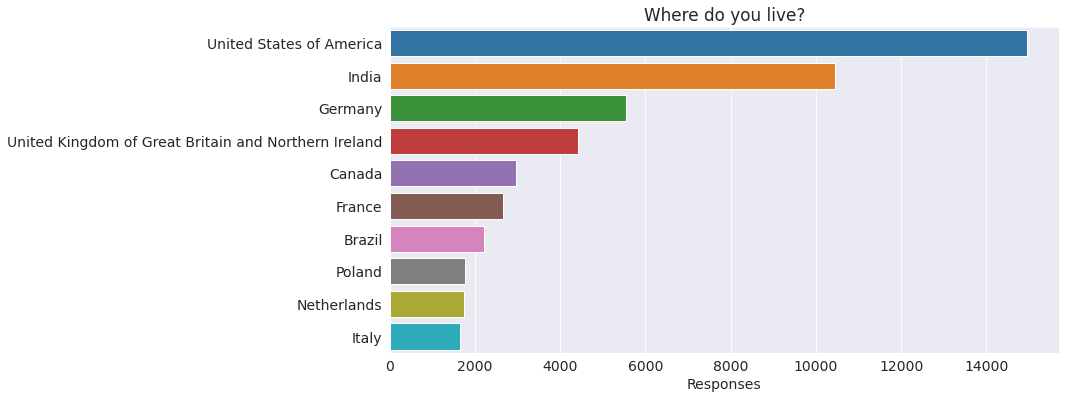

In [36]:
#plot in numbers

plt.figure(figsize = (12,6))
plt.title("Where do you live?")
sns.barplot(x = 'Responses', y = 'Response', data = country_df.head(10))
plt.ylabel('');

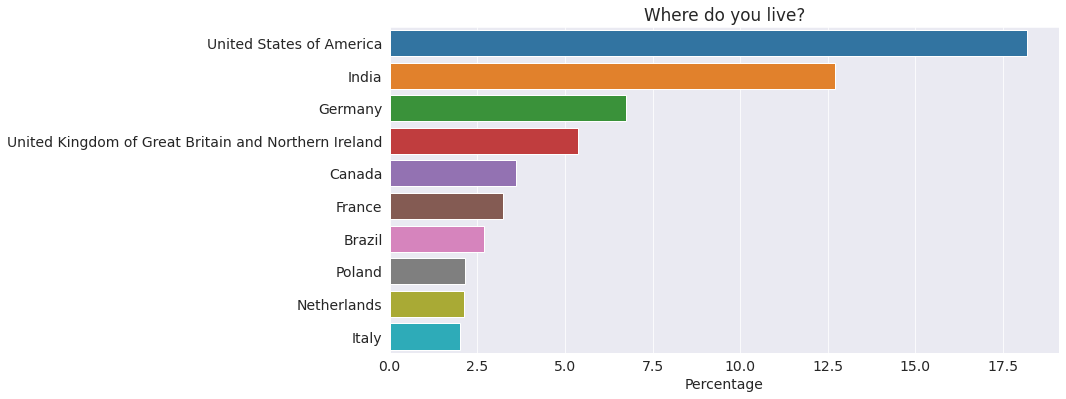

In [37]:
#plot in percentage

plt.figure(figsize = (12,6))
plt.title("Where do you live?")
sns.barplot(x = 'Percentage', y = 'Response', data = country_df.head(10))
plt.ylabel('');

A very high number of respondents are from United States and India, probably because the survey was in English and these two countries have the highest number of English speaking populations. This shows that the survey does not represent the global programming community as a whole, specially people from non-English speaking countries.

### Age

The distribution of the respondents age is another crucial factor to look at

In [38]:
schema.Age

'What is your age?'

In [189]:
age_groups = survey_df.Age.value_counts()

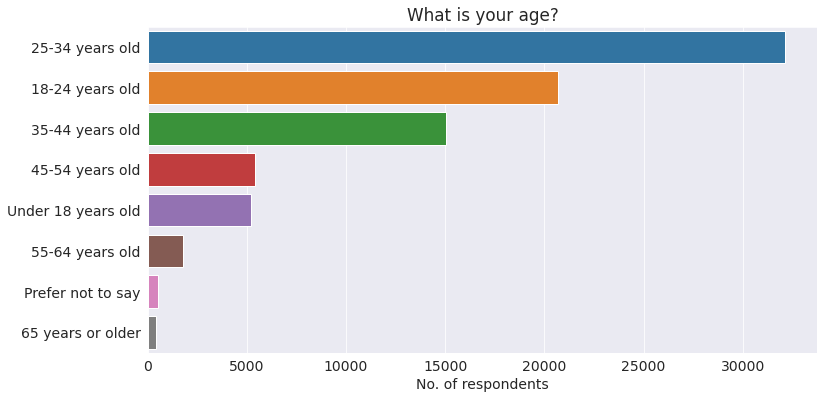

In [40]:
plt.figure(figsize = (12,6))
plt.title(schema.Age)
sns.barplot(x = age_groups.values, y = age_groups.index)
plt.xlabel("No. of respondents");

It appears that a large number of respondents are 18-45 years old. This is somewhat representative of the overall programming community in general, as many young people have taken computer science as their field of study in the last 20 years.

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

### Gender

Let's look at the gender distribution of the respondents. It is a well-known fact that women and non-binary genders are underrepresented in the programming community, so we may expect to see skewed distribution here.

In [42]:
print(schema.Gender)
survey_df.Gender.value_counts()

Which of the following describe you, if any? Please check all that apply.


Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Name: Gender, dtype: int64

In [43]:
gender_distribution = survey_df.Gender.value_counts()

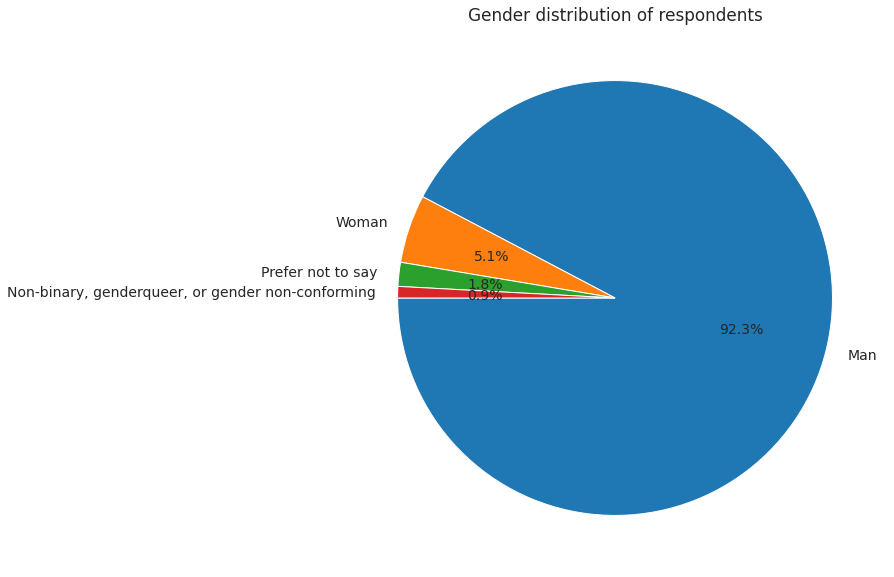

In [44]:
plt.figure(figsize = (12,10))
plt.title("Gender distribution of respondents")
plt.pie(gender_distribution, labels = gender_distribution.index, autopct = "%1.1f%%", startangle = 180);

Only about 7% of the respondents who have answered the question identify as women or non-binary. This is lower that the overall percentage of woman and non-binary in the programming community.

### Education Level

Let's see how important is formal education for a career in professional programing.

In [45]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [46]:
education_level = survey_df.EdLevel.value_counts()*100/survey_df.EdLevel.count()

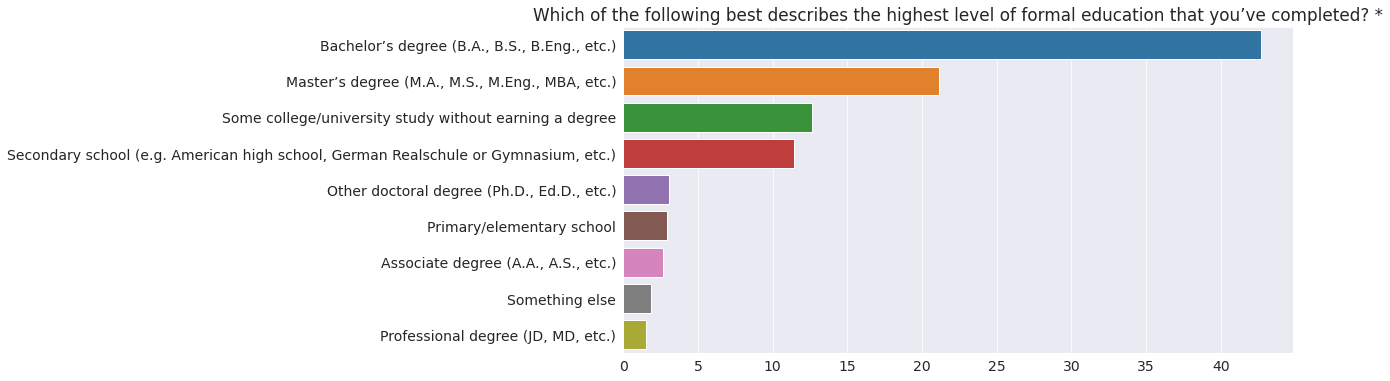

In [47]:
plt.title(schema.EdLevel)
sns.barplot(x = education_level.values, y = education_level.index);

70% of all respondents have completed some form of higher education, bachelor's degree being the most common.

### Employment

In [48]:
schema.Employment

'Which of the following best describes your current <b>employment status</b>?'

In [49]:
employment_status = survey_df.Employment.value_counts()*100/survey_df.Employment.count()
employment_status

Employed full-time                                      64.533022
Student, full-time                                      14.078161
Independent contractor, freelancer, or self-employed     9.625760
Not employed, but looking for work                       3.526847
Employed part-time                                       2.949594
Student, part-time                                       2.440539
Not employed, and not looking for work                   1.432173
I prefer not to say                                      1.041248
Retired                                                  0.372657
Name: Employment, dtype: float64

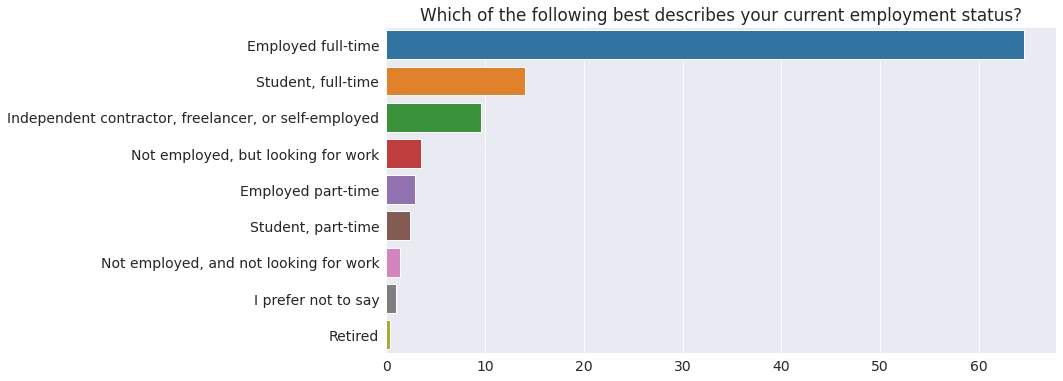

In [50]:
# plt.figure(figsize = (12,8))
plt.title("Which of the following best describes your current employment status?")
sns.barplot(x = employment_status.values, y = employment_status.index);

More than 60% of the respondents are employed full time, and nearly 10% are freelancers or employed part-time.

In [51]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                    8517
Developer, back-end                                                                                                                                      5418
Developer, front-end                                                                                                                                     2384
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                           2122
Developer, full-stack;Developer, back-end                                                                                                                1756
                                                                                                                                                         ... 
Developer, front-end;Developer, desktop or enterpris

The `DevType` column contains information about the roles held by employed respondents. Since the question allowed multiple options, the list of values separated by `;` making it harder to analyze.

We will make a helper function, `split_values` that will convert the column containing a list of values into a data frame with one column for each possible options.

`to_frame()` method is used to convert a series into a dataframe

In [52]:
def split_values(col_series):
    result_df = col_series.to_frame()
    options = []
    
    for  idx, values in col_series[col_series.notnull()].items():
        for option in values.split(';'):
            if option not in result_df:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
            
    return result_df[options]

In [53]:
dev_type_df = split_values(survey_df.DevType)

In [54]:
dev_type_df

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
dev_type = dev_type_df.mean() *100

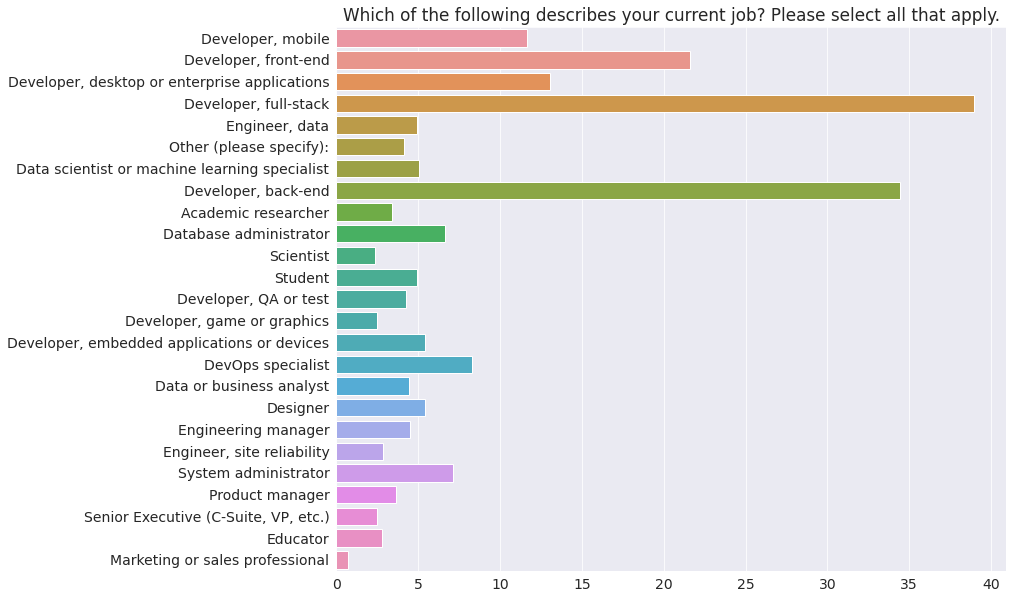

In [56]:
plt.figure(figsize = (12,10))
plt.title(schema.DevType)
sns.barplot(x = dev_type.values, y = dev_type.index);

Full-stack, front-end, back-end, and mobile developers account for the majority of all the respondents

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

## Asking and answering questions


#### Q. What is the most used programming language?

In [58]:
schema.Language

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [59]:
survey_df.LanguageHaveWorkedWith.value_counts()

Python                                                 1318
HTML/CSS;JavaScript;Node.js;TypeScript                  806
Java                                                    706
HTML/CSS;JavaScript;PHP;SQL                             667
C#                                                      589
                                                       ... 
C;C#;HTML/CSS;JavaScript;PHP;Python;Rust;TypeScript       1
C#;Java;JavaScript;Node.js;PHP;TypeScript                 1
C#;HTML/CSS;Java;Node.js;PowerShell                       1
C#;C++;JavaScript;Node.js;PowerShell;Python;SQL           1
Delphi;Elixir;HTML/CSS;Java;JavaScript                    1
Name: LanguageHaveWorkedWith, Length: 28281, dtype: int64

Here also the survey allowed respondents to choose multiple options. We will use our helper function, `split_values`, to convert the column containing list of information into a new data frame in which there is one column for each option available.

In [60]:
language_worked = split_values(survey_df.LanguageHaveWorkedWith)
language_worked

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Clojure,APL,LISP,F#,Groovy,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
language_worked_percentage = language_worked.mean().sort_values(ascending = False)*100
language_worked_responses = language_worked.sum().sort_values(ascending = False)

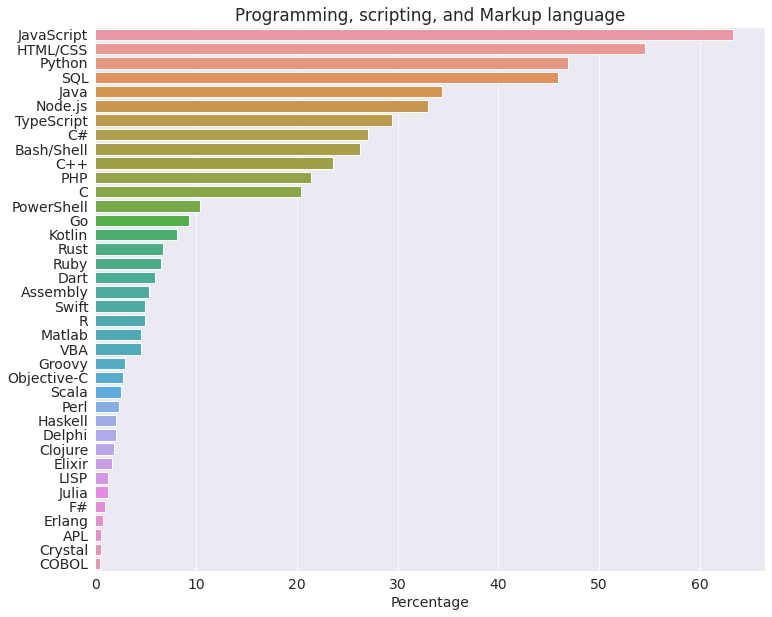

In [62]:
plt.figure(figsize = (12,10))
plt.title("Programming, scripting, and Markup language")
sns.barplot(x = language_worked_percentage.values, y = language_worked_percentage.index)
plt.xlabel("Percentage");

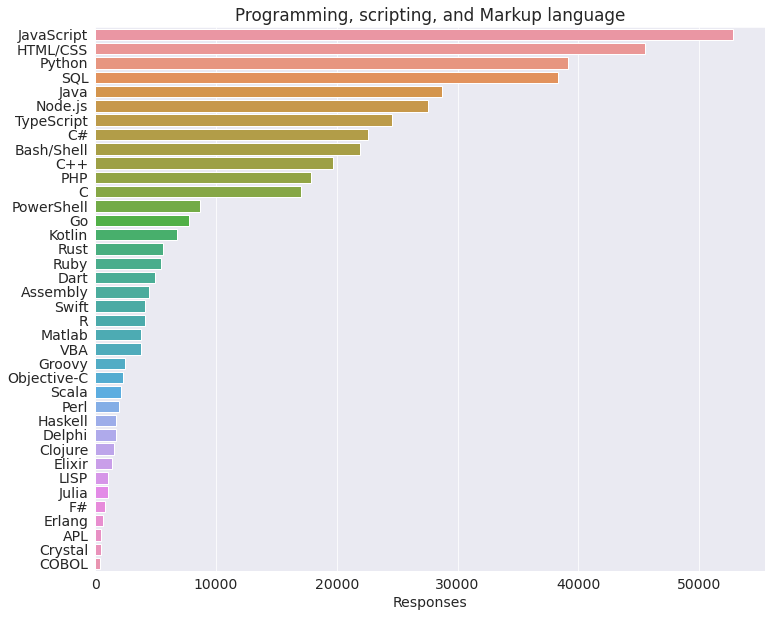

In [63]:
plt.figure(figsize = (12,10))
plt.title("Programming, scripting, and Markup language")
sns.barplot(x = language_worked_responses.values, y = language_worked_responses.index)
plt.xlabel("Responses");

JavaScript remains the most commonly used programming language for the 9th year, since for most developers programming is web programming. Python traded place with SQL to become the third most used programming language.

#### Q. What is the most used Database?

In [64]:
schema.Database

'Which <b>database environments </b>have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

In [65]:
survey_df.DatabaseHaveWorkedWith.value_counts()

MySQL                                                          4717
Microsoft SQL Server                                           3777
PostgreSQL                                                     3487
SQLite                                                         2142
MongoDB                                                        1627
                                                               ... 
Cassandra;Firebase;MySQL;PostgreSQL;Redis                         1
DynamoDB;Firebase;Oracle;PostgreSQL;Redis                         1
Couchbase;MariaDB;Microsoft SQL Server;MongoDB;MySQL;SQLite       1
DynamoDB;Firebase;MongoDB;Oracle;PostgreSQL                       1
DynamoDB;IBM DB2;Microsoft SQL Server;PostgreSQL;Redis            1
Name: DatabaseHaveWorkedWith, Length: 3051, dtype: int64

In [66]:
# call the split_values function to create a new data frame
database_worked = split_values(survey_df.DatabaseHaveWorkedWith)
database_worked

,PostgreSQL,SQLite,Elasticsearch,Redis,MySQL,Microsoft SQL Server,Oracle,MongoDB,MariaDB,DynamoDB,Couchbase,Firebase,Cassandra,IBM DB2
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,True,False,False,False,False,True,False,False,False,False,False,False,False
83435,True,True,False,True,True,False,False,False,True,False,False,True,False,False
83436,True,False,True,True,False,False,False,True,False,True,False,False,False,False
83437,True,False,True,True,False,False,False,True,False,False,False,False,True,False


In [67]:
database_worked_percentage = database_worked.mean().sort_values(ascending = False) * 100
database_worked_response = database_worked.sum().sort_values(ascending = False)

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

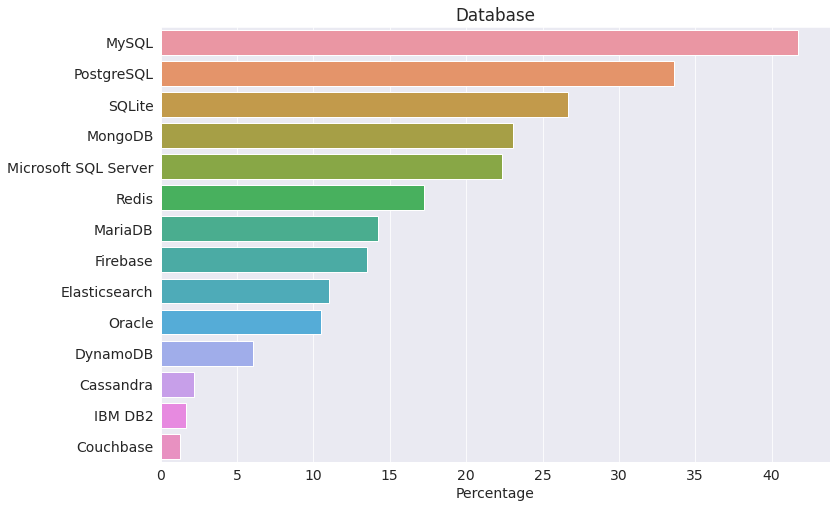

In [69]:
plt.figure(figsize = (12,8))
plt.title("Database")
sns.barplot(x = database_worked_percentage, y = database_worked_percentage.index)
plt.xlabel("Percentage");

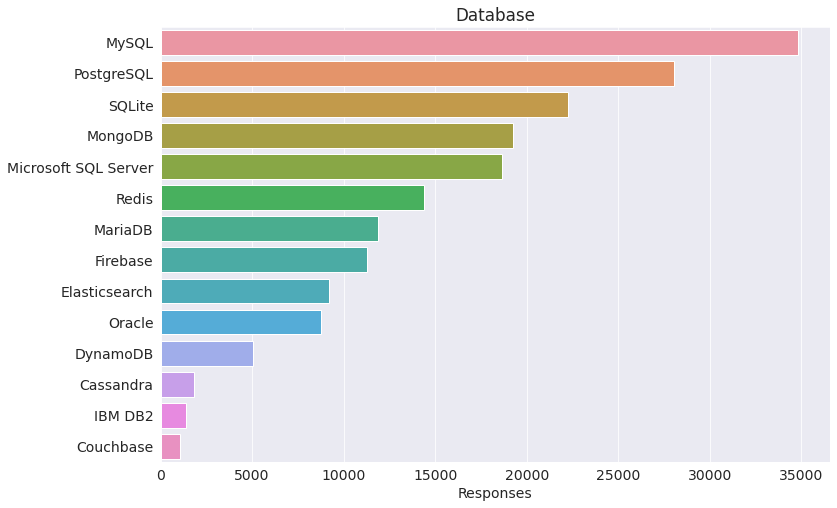

In [70]:
plt.figure(figsize = (12,8))
plt.title("Database")
sns.barplot(x = database_worked_response, y = database_worked_response.index)
plt.xlabel("Responses");

**MySQL** is the most commonly used database, followed by PostgreSQL

#### Q. What languages and databases are people most interested in learning over the next few years?

In [71]:
survey_df.LanguageWantToWorkWith.value_counts()

Python                                                                                 1367
Rust                                                                                    812
HTML/CSS;JavaScript;Node.js;TypeScript                                                  808
C#                                                                                      689
Java                                                                                    507
                                                                                       ... 
C#;Erlang;F#;PowerShell;SQL;TypeScript                                                    1
JavaScript;Node.js;Python;Swift;VBA                                                       1
Delphi;HTML/CSS;Java;JavaScript;SQL;TypeScript                                            1
C;C++;Dart;Go;HTML/CSS;JavaScript;Kotlin;Matlab;Node.js;Python;SQL;Swift;TypeScript       1
Elixir;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript                      

In [72]:
survey_df.DatabaseWantToWorkWith.value_counts()

PostgreSQL                                                                               4140
MySQL                                                                                    2405
Microsoft SQL Server                                                                     2364
MongoDB                                                                                  1921
PostgreSQL;Redis                                                                         1561
                                                                                         ... 
Elasticsearch;Firebase;MariaDB;MongoDB;Oracle;Redis                                         1
Elasticsearch;MariaDB;Microsoft SQL Server;Oracle;PostgreSQL;Redis                          1
Cassandra;Couchbase;Firebase;MongoDB                                                        1
Cassandra;Elasticsearch;Firebase;Microsoft SQL Server;MongoDB;PostgreSQL;Redis;SQLite       1
Cassandra;Elasticsearch;MariaDB;MySQL;Oracle;PostgreSQL     

In [73]:
# call the helper function split_values

database_learn = split_values(survey_df.DatabaseWantToWorkWith)
language_learn = split_values(survey_df.LanguageWantToWorkWith)

In [74]:
# language learn 
language_learn_percentage = language_learn.mean().sort_values(ascending = False) * 100
language_learn_reponse = language_learn.sum().sort_values(ascending = False)

# database learn
database_learn_percentage = database_learn.mean().sort_values(ascending = False) * 100
database_learn_response = database_learn.sum().sort_values(ascending = False)

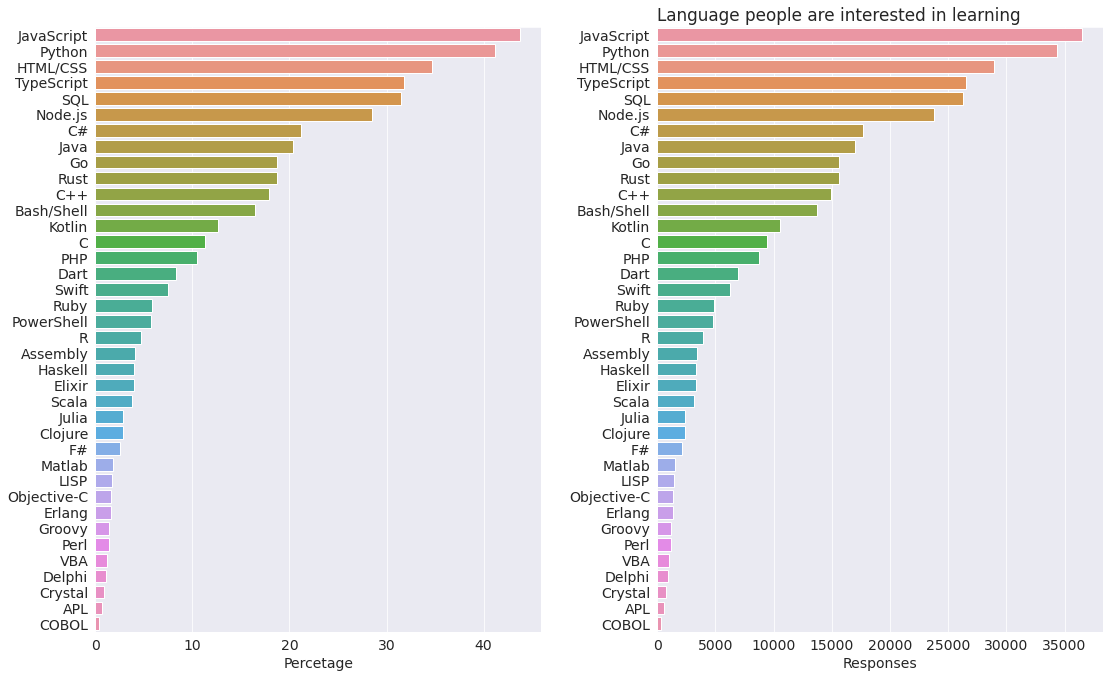

In [75]:
# language learn plot
fig, axes = plt.subplots(1,2, figsize = (16,10))

plt.title("Language people are interested in learning", loc = 'left')
# percentage
#axes[0].set_title("In percentage")
axes[0].set_xlabel("Percetage")
sns.barplot(x = language_learn_percentage.values, y = language_learn_percentage.index, ax = axes[0]);

#responses
#axes[1].set_title("In numbere")
axes[1].set_xlabel("Responses")
sns.barplot(x = language_learn_reponse.values, y = language_learn_reponse.index, ax = axes[1]);

plt.tight_layout(pad = 2);

JavaScript overtook Python as the language people are most interested in learning.

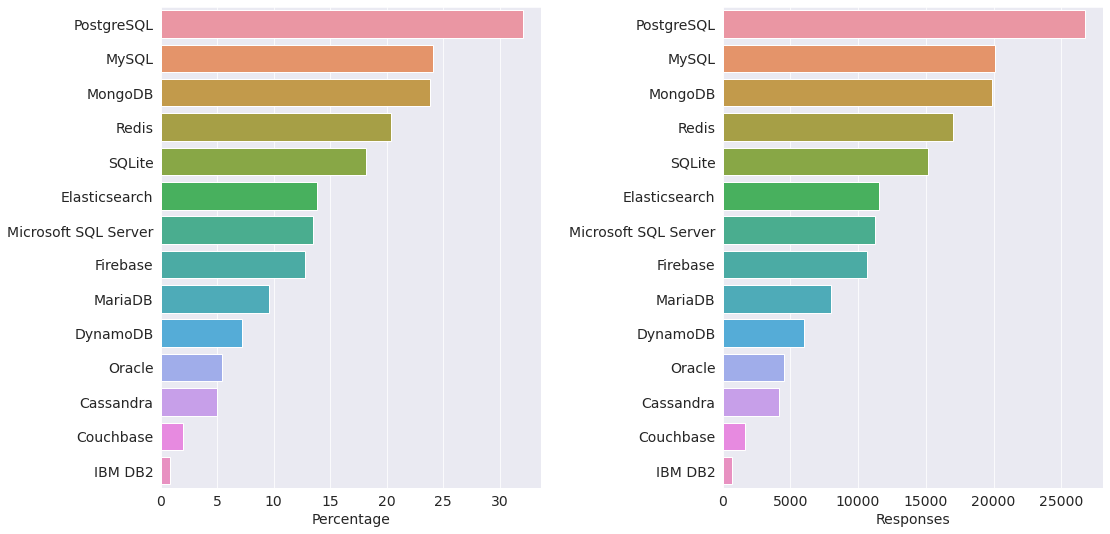

In [76]:
# database learn plot
fig, axes = plt.subplots(1,2, figsize = (16,8))

# percentage
axes[0].set_xlabel("Percentage")
sns.barplot(x = database_learn_percentage.values, y = database_learn_percentage.index, ax = axes[0]);

# reponses
axes[1].set_xlabel("Responses")
sns.barplot(x = database_learn_response.values, y = database_learn_response.index, ax = axes[1]);

plt.tight_layout(pad = 2);


PostgreSQL is the database people are most interested in learning over the next few years, followed by MySQL.

#### Q. Most loved and dreaded language and database?


To find the most loved and dreaded databases and languages:
- Create a new data frame `language_loved` and `language_dreaded`, which contains True value for a language if it's value is True in both `language_worked` and `language_learn`. For dreaded language, we will use `~language_learn`, which will tell us the language people have used but don't want to continue/learn more in the future. 
- Take column-wise sum of `language_loved` and divide by the column-wise sum of `language_worked` to get the percentage of respondents who love the language and are currently working with it.
- Follow the same steps for most loved and most dreaded databases.

In [77]:
# languages loved and dreaded
language_loved = language_worked & language_learn
language_dreaded = language_worked & ~language_learn

# database loved and dreaded
database_loved = database_worked & database_learn
database_dreaded = database_worked & ~database_learn

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

In [79]:
# langauage loved and dreaded percentage
language_loved_pct = np.round((language_loved.sum()/language_worked.sum()).sort_values(ascending = False) * 100, 2)
language_dreaded_pct = np.round((language_dreaded.sum()/language_worked.sum()).sort_values(ascending = True) * 100, 2)

# database loved and dreaded percentage
database_loved_pct = (database_loved.sum()/database_worked.sum()).sort_values(ascending = False) * 100
database_dreaded_pct = (database_dreaded.sum()/database_worked.sum()).sort_values(ascending = True) * 100

In [80]:
language_dreaded_pct

Rust           12.98
Clojure        18.59
TypeScript     27.20
Elixir         27.41
Julia          28.41
Python         32.16
Dart           36.16
Swift          36.23
Node.js        36.67
Go             37.25
F#             37.44
C#             37.98
SQL            38.17
JavaScript     38.42
Kotlin         38.43
HTML/CSS       39.77
Crystal        40.45
Bash/Shell     43.74
LISP           45.09
Erlang         45.75
Ruby           46.59
Haskell        47.11
Scala          47.65
APL            49.30
C++            50.91
Delphi         52.66
Java           52.84
R              55.83
PowerShell     56.57
PHP            59.78
C              60.70
Perl           64.38
Assembly       66.65
Groovy         68.06
Objective-C    73.39
Matlab         78.57
VBA            79.62
COBOL          85.10
dtype: float64

In [81]:
language_loved_pct.index

Index(['Rust', 'Clojure', 'TypeScript', 'Elixir', 'Julia', 'Python', 'Dart',
       'Swift', 'Node.js', 'Go', 'F#', 'C#', 'SQL', 'JavaScript', 'Kotlin',
       'HTML/CSS', 'Crystal', 'Bash/Shell', 'LISP', 'Erlang', 'Ruby',
       'Haskell', 'Scala', 'APL', 'C++', 'Delphi', 'Java', 'R', 'PowerShell',
       'PHP', 'C', 'Perl', 'Assembly', 'Groovy', 'Objective-C', 'Matlab',
       'VBA', 'COBOL'],
      dtype='object')

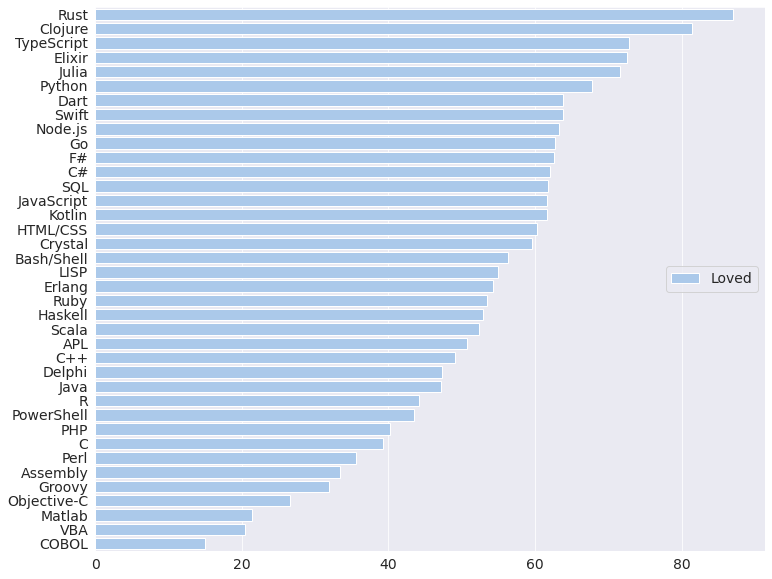

In [82]:
# language plot
plt.figure(figsize = (12,10))

sns.set_color_codes('pastel')
sns.barplot(x = language_loved_pct.values, y = language_loved_pct.index, label = "Loved", color = 'b')
plt.legend(loc = 'right');

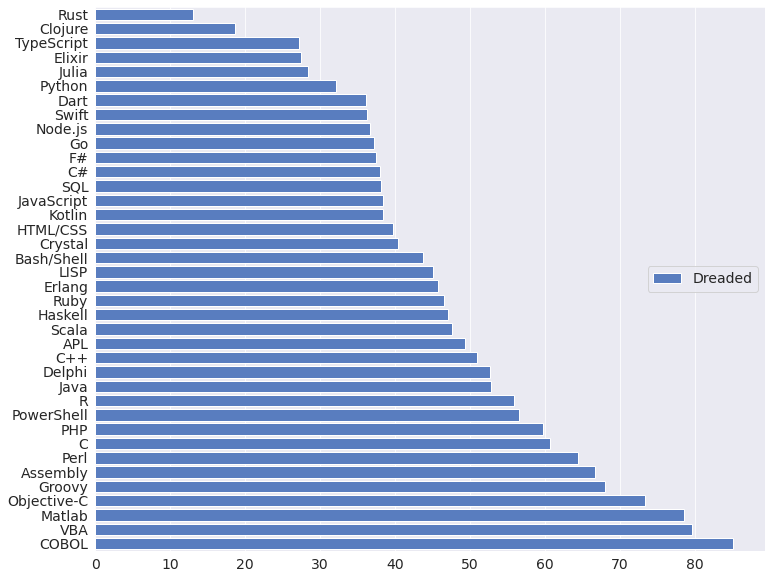

In [83]:
# language dreaded plot
plt.figure(figsize = (12,10))

sns.set_color_codes('muted')
sns.barplot(x = language_dreaded_pct.values, y = language_loved_pct.index, label = 'Dreaded', color = 'b')
plt.legend(loc = 'right');

**Rust** is the most loved language for the fifth-year, while COBOL is the most dreaded language

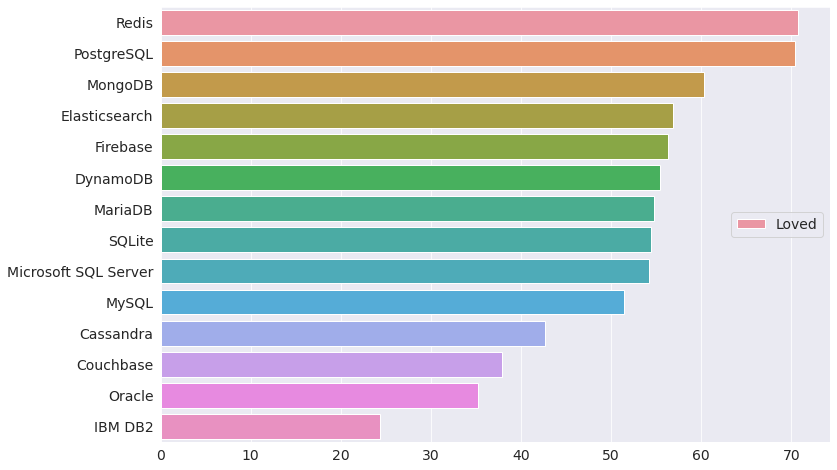

In [84]:
# database loved plot
plt.figure(figsize = (12,8))

sns.barplot(x = database_loved_pct.values, y = database_loved_pct.index, label = "Loved")
plt.legend(loc = 'right');


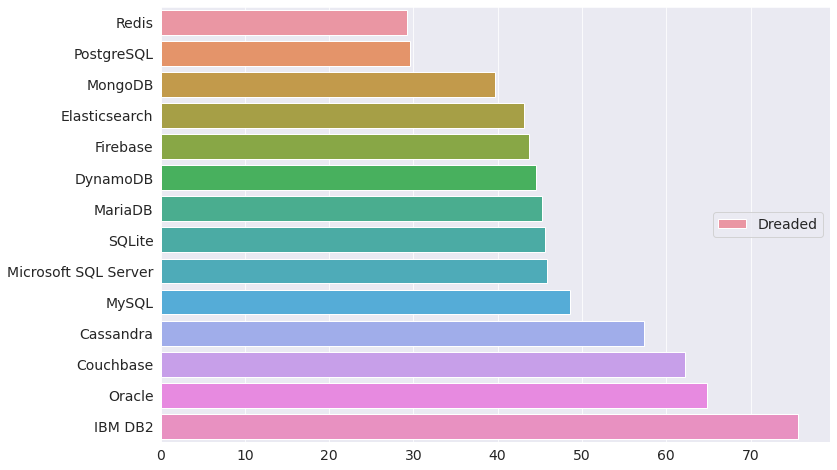

In [85]:
# database dreaded plot
plt.figure(figsize = (12,8))

sns.barplot(x = database_dreaded_pct.values, y = database_dreaded_pct.index, label = "Dreaded")
plt.legend(loc = 'right');

Redis is the most loved database for the fifth-year, while IBM DB2 is the most dreaded for the second year.

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/stack-overflow-survey-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021


'https://jovian.ai/darpit-choudhary/stack-overflow-survey-2021'

In [87]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 82222 non-null  object 
 1   Gender                  81069 non-null  object 
 2   Age                     81204 non-null  object 
 3   EdLevel                 81917 non-null  object 
 4   Age1stCode              82030 non-null  object 
 5   YearsCode               78861 non-null  float64
 6   YearsCodePro            57780 non-null  float64
 7   LearnCode               81756 non-null  object 
 8   Employment              82113 non-null  object 
 9   DevType                 65661 non-null  object 
 10  CompTotal               46647 non-null  float64
 11  CompFreq                51540 non-null  object 
 12  SOAccount               81346 non-null  object 
 13  NEWStuck                81847 non-null  object 
 14  LanguageHaveWorkedWith  81176 non-null

#### Q. At what age did you write your first code or line of program?

In [88]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) '

In [99]:
age_first = survey_df.Age1stCode.value_counts() * 100/survey_df.Age1stCode.count()
age_first

11 - 17 years           53.108619
18 - 24 years           24.225283
5 - 10 years            13.947336
25 - 34 years            5.059125
35 - 44 years            1.583567
Younger than 5 years     1.043521
45 - 54 years            0.658296
55 - 64 years            0.288919
Older than 64 years      0.085335
Name: Age1stCode, dtype: float64

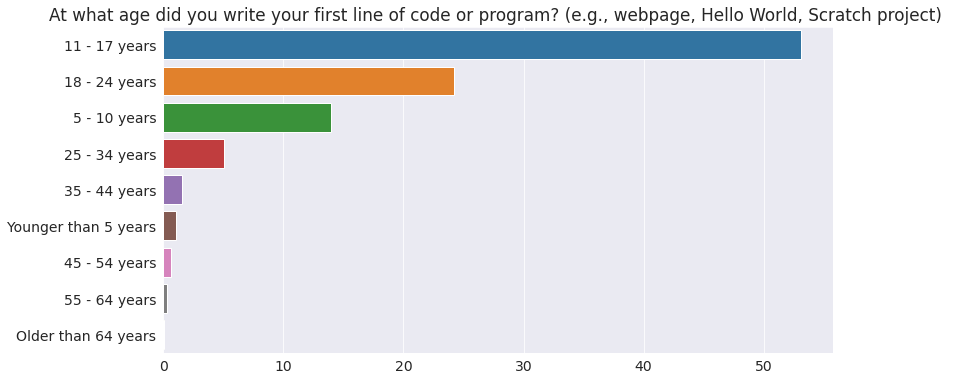

In [101]:
plt.figure(figsize = (12,6))
plt.title(schema.Age1stCode)
sns.barplot(x = age_first.values, y = age_first.index);

Coders start young, 50% of respondents wrote their first line of code/program between the age of 11 to 17.

In [103]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

#### Including any education, how many years have you been coding in total?

In [149]:
years_code = survey_df.YearsCode.value_counts()


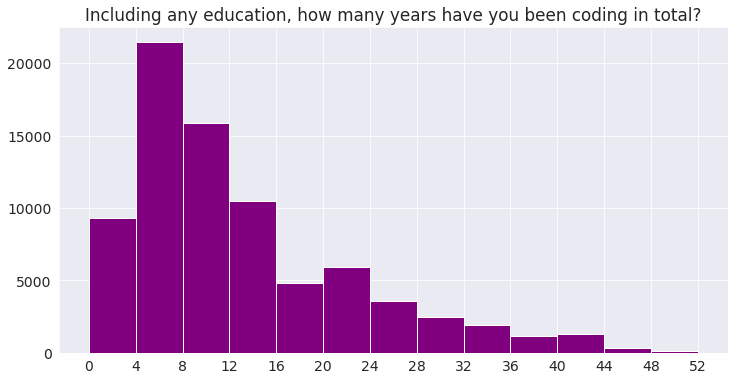

In [130]:
plt.figure(figsize = (12,6))
plt.title(schema.YearsCode)
plt.hist(x = survey_df.YearsCode, bins = np.arange(0, 54, 4), color = 'purple')
plt.xticks(np.arange(0,54,4));

In [139]:
years_code_country = survey_df.groupby('Country').mean().sort_values('YearsCode', ascending = False)
years_code_df = years_code_country.loc[country_df.Response].head(10)

In [145]:
years_code_df.index

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Italy'],
      dtype='object', name='Country')

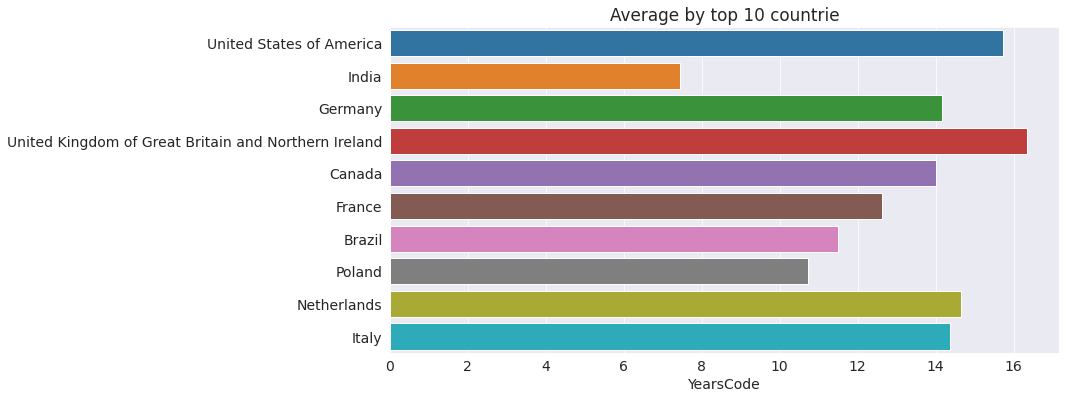

In [148]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'YearsCode', y = years_code_df.index, data = years_code_df.head(10))
plt.title("Average by top 10 countrie")
plt.ylabel('');

50% of respondents have been coding for 10 years or less. Respondents from United Kingdom, on average, have the most years coding out of the top 10 countries.

#### Q. Not including education, how many years have you coded professionally (as  a part of your work)?

In [232]:
survey_df.YearsCodePro.value_counts()

3.0     5748
2.0     5406
5.0     5035
4.0     4740
6.0     3756
10.0    3731
7.0     3117
1.0     3011
8.0     2813
15.0    2232
20.0    1812
9.0     1795
12.0    1710
11.0    1521
13.0    1259
14.0    1085
16.0     953
25.0     892
17.0     765
21.0     753
18.0     686
22.0     650
23.0     522
30.0     520
24.0     433
19.0     388
26.0     317
35.0     249
27.0     235
28.0     219
32.0     182
31.0     153
33.0     147
40.0     146
29.0     143
36.0     114
34.0     102
37.0      89
38.0      77
42.0      50
39.0      43
41.0      38
45.0      34
43.0      31
44.0      29
47.0      13
46.0      12
50.0      10
48.0       9
49.0       5
Name: YearsCodePro, dtype: int64

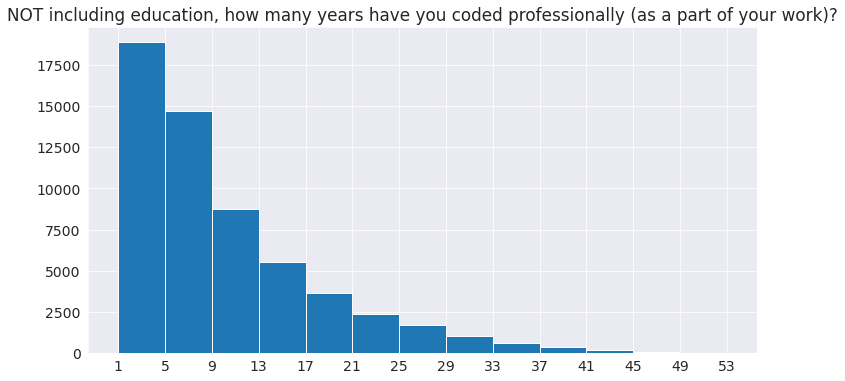

In [176]:
plt.title(schema.YearsCodePro)
plt.hist(x = survey_df.YearsCodePro, bins = np.arange(1, 55, 4))
plt.xticks(np.arange(1,55,4));

A majority of respondents have been working for 10 or less years as a professional developer.

In [177]:
survey_df.columns

Index(['Country', 'Gender', 'Age', 'EdLevel', 'Age1stCode', 'YearsCode',
       'YearsCodePro', 'LearnCode', 'Employment', 'DevType', 'CompTotal',
       'CompFreq', 'SOAccount', 'NEWStuck', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith'],
      dtype='object')

#### Q. How did you learn to code?

In [178]:
schema.LearnCode

'How did you learn to code? Select all that apply.'

In [181]:
survey_df.LearnCode.value_counts()

School                                                                                                                           7176
Other online resources (ex: videos, blogs, etc)                                                                                  3436
Books / Physical media                                                                                                           3323
School;Books / Physical media                                                                                                    3105
Other online resources (ex: videos, blogs, etc);School;Books / Physical media                                                    2407
                                                                                                                                 ... 
Coding Bootcamp;School;Online Forum;Friend or family member;Other (please specify):;Colleague                                       1
Online Forum;Friend or family member;Online Courses or Certifi

In [184]:
# call the helper function
learn_code_df = split_values(survey_df.LearnCode).mean().sort_values(ascending = False) * 100
learn_code_df

Other online resources (ex: videos, blogs, etc)    58.314457
School                                             52.609691
Books / Physical media                             50.543511
Online Courses or Certification                    39.660111
Online Forum                                       30.915999
Friend or family member                            17.829792
Colleague                                          16.841046
Coding Bootcamp                                    10.007311
Other (please specify):                             8.003452
dtype: float64

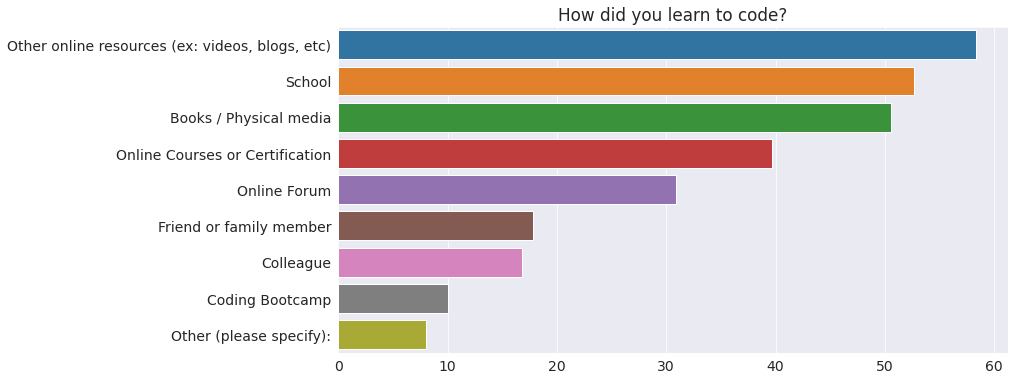

In [246]:
plt.figure(figsize = (12,6))
plt.title("How did you learn to code?")
sns.barplot(x = learn_code_df.values, y = learn_code_df.index);

With large amount of tutorials, blogs, forums and other resources available online it is no surprise that nearly 60% respondents learned how to code through online resources.

Older, respondents on the other hand learned from more traditional mediums like school, and books.

#### Q. What do you do when you get stuck?

In [207]:
schema.NEWStuck

'What do you do when you get stuck on a problem? Select all that apply.'

In [208]:
# call the helper function split_values
new_stuck = split_values(survey_df.NEWStuck)

In [215]:
new_stuck_pct = new_stuck.mean().sort_values(ascending = False) * 100
new_stuck_pct

Google it                                           88.049953
Visit Stack Overflow                                78.547202
Do other work and come back later                   46.972039
Watch help / tutorial videos                        42.766572
Call a coworker or friend                           38.770839
Go for a walk or other physical activity            36.276801
Play games                                          14.184015
Panic                                               11.556946
Meditate                                             9.108450
Visit another developer community (please name):     7.678663
Other (please specify):                              6.655161
dtype: float64

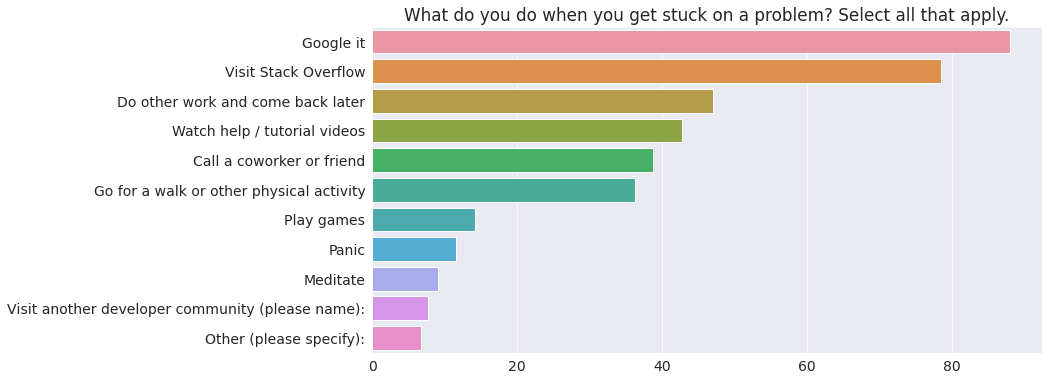

In [216]:
plt.figure(figsize = (12,6))
plt.title(schema.NEWStuck)
sns.barplot(x = new_stuck_pct.values, y = new_stuck_pct.index);

Respondents most often visit google or StackOverflow when they get stuck.

In [218]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 82222 non-null  object 
 1   Gender                  81069 non-null  object 
 2   Age                     81204 non-null  object 
 3   EdLevel                 81917 non-null  object 
 4   Age1stCode              82030 non-null  object 
 5   YearsCode               78861 non-null  float64
 6   YearsCodePro            57780 non-null  float64
 7   LearnCode               81756 non-null  object 
 8   Employment              82113 non-null  object 
 9   DevType                 65661 non-null  object 
 10  CompTotal               46647 non-null  float64
 11  CompFreq                51540 non-null  object 
 12  SOAccount               81346 non-null  object 
 13  NEWStuck                81847 non-null  object 
 14  LanguageHaveWorkedWith  81176 non-null

#### How many of the respondents have a StackOverflow account?

In [219]:
schema.SOAccount

'Do you have a Stack Overflow account?'

In [222]:
account = survey_df.SOAccount.value_counts() * 100/survey_df.SOAccount.count()
account

Yes                        82.263418
No                         12.652128
Not sure/can't remember     5.084454
Name: SOAccount, dtype: float64

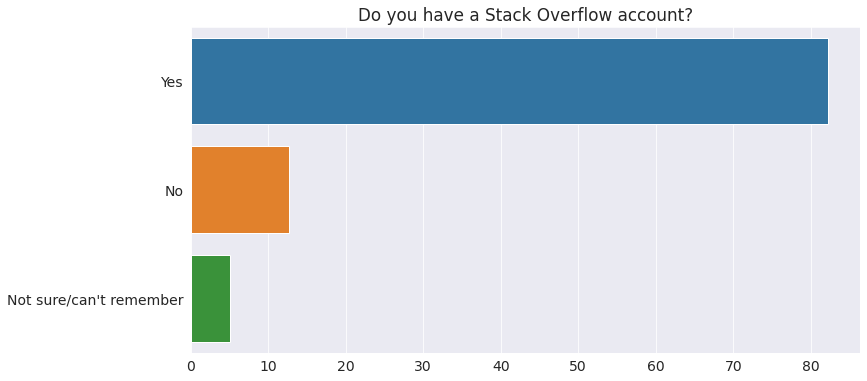

In [225]:
plt.title(schema.SOAccount)
sns.barplot(x = account.values, y = account.index);

#### Q. How important is to start young to build a career in programming?

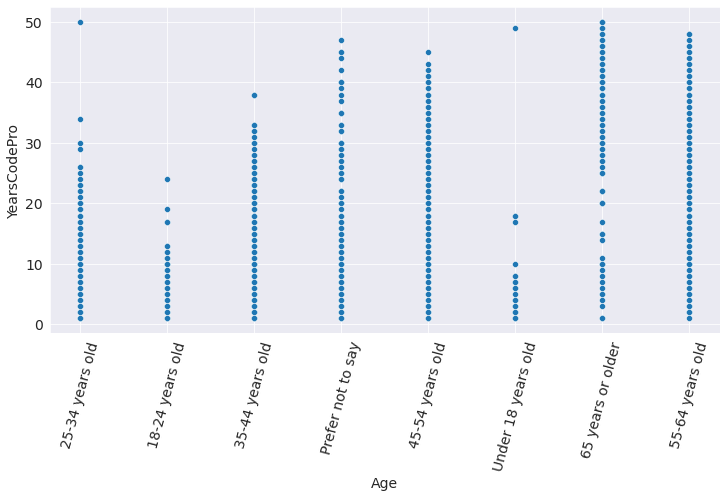

In [245]:
sns.scatterplot(x = 'Age', y = 'YearsCodePro', data = survey_df)
plt.xticks(rotation = 75); 

Although not very clear at first, the above graph indicates that **one can start programming professionally at any age**

80% of the respondents have a StackOverflow account

## Inferences and conclusions

Based on the analysis of the survey we've drawn many inferences. Here is brief summary:
- Based on our analysis of respondents demographics, we can infer that the survey is somewhat representative of the global programming community. However, it has very few responses from non-English speaking countries.
- The programming community is not as diverse as it can be, less than 10% of the respondents identified as either women or non-binary. Although, things are improving, we should make and effort to support and encourage the underrepresented community, whether in terms of age, gender, ethnicity, or race or otherwise.
- Most of the professional programmers have completed some sort of college education.
- About 10% of the respondents either work as freelancers or employed part-time, which can be great way to break into the field, especially when you are just getting started.
- Majority of the respondents work in full-stack, front-end, back-end, and mobile development.
- For the 9th year JavaScript was the most commonly used programming language, since for most developers programming is we programming.
- Rust is the most loved language for the fifth-year, while COBOL is the most dreaded.
- MySQL is the most commonly used database, followed by PostgreSQL.
- Redis is the most loved database for the fifth-year, while IBS DB2 is the most dreaded for second year.
- A lot of programmers start at a young age, with more than 50% respondents wrote their first code between 11 to 17 years of age.
- You can learn and start programming professionally at any age.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>